# Spatial Data Analysis - mini Project
# Grocery Shops within London

## try to analyse the spatial distribution of the shops in London

In [82]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

from shapely.geometry import Point

import pysal as ps

import warnings
warnings.simplefilter('ignore')

## Data Preprocessing

In [27]:
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import Overpass
nominatim = Nominatim()
areaId = nominatim.query('London, UK').areaId()
areaId

3600065606

In [28]:
api = Overpass()
r1 = api.query("""
area(3600065606);
node["shop"="supermarket"](area);
out;
""")
# print (r.nodes()[0].geometry)

In [29]:
coords  = []
coords += [[node.id(), node.tag('name'), node.tag('shop'), node.tag('brand'), float(node.lon()), float(node.lat())]
           for node in r1.nodes()]

In [30]:
r2 = api.query("""
area(3600065606);
node["shop"="convenience"](area);
out;
""")

In [31]:
coords += [[node.id(), node.tag('name'), node.tag('shop'), node.tag('brand'), float(node.lon()), float(node.lat())]
           for node in r2.nodes()]

In [32]:
shop_df = pd.DataFrame(coords, columns = ['id', 'name', 'type', 'brand', 'longitude', 'latitude'])
shop_df

,id,name,type,brand,longitude,latitude
0,25544124,Tesco Metro,supermarket,Tesco Metro,-0.125165,51.511122
1,25744394,Tesco Express,supermarket,Tesco Express,-0.149359,51.562078
2,25813308,tesco express,supermarket,None,-0.133341,51.545341
3,26618618,Marks and Spencer,supermarket,None,-0.142041,51.537810
4,26817795,Tesco Express,supermarket,None,-0.158722,51.522805
...,...,...,...,...,...,...
2819,7401591150,Sainsbury's Local,convenience,Sainsbury's Local,-0.205008,51.497141
2820,7401798511,Sainsbury's Local,convenience,Sainsbury's Local,-0.129237,51.432494
2821,7419375764,Sainsbury's Local,convenience,Sainsbury's Local,-0.210045,51.402717
2822,7433268116,None,convenience,None,0.019572,51.550955


In [33]:
print (set(shop_df['brand']))

{'Tesco Metro', 'Sainsburys', 'Co-op', 'The Co-operative Food', "Sainsbury's Local", 'Whole Foods Market', 'Ministop', "McColl's", 'Spar', 'Aldi', 'Post Office', 'Farmfoods', 'Waitrose', 'Nisa', 'Shell', 'Best-one', 'Hudson', 'Budgens', 'Costcutter', 'Shell Select', 'Federated Co-operatives', 'Texaco', None, 'Asda', "Sainsbury's", 'Premier', 'M&S Foodhall', 'Marks & Spencer', 'Little Waitrose', 'Londis', 'Lycamobile', 'Iceland', 'Tesco', 'Nisa Local', 'Jumbo', 'Lidl', 'Market Basket', 'Tesco Express', 'M&S Simply Food'}


In [34]:
brands_dict = {'whole foods':'Whole Foods', 'mark & spencer' : 'M&S', 'marks & spencer' : 'M&S', 'marks and spencer' : 'M&S', 'm&s':'M&S', 'waitrose':'Waitrose', "sainsbury" : "Sainsbury's", 'co-op':'Co-op', 'co-operative':'Co-op', 'tesco':'Tesco', 'asda':'Asda', 'lidl':'Lidl', 'aldi':'Aldi', 'iceland':'Iceland', 'morrisons': 'Morrisons'}

def brand_mapping(name):
    if name is not None:
        for key in brands_dict:
            # print (name, key)
            if key in name.lower() :
                return brands_dict[key]
    return 'Others'

shop_df['brand'] = shop_df.apply(lambda row:brand_mapping(row['name']), axis = 1)


In [35]:
geometry = [Point(xy) for xy in zip(shop_df.longitude, shop_df.latitude)]

In [36]:
shop_gdf = gpd.GeoDataFrame(shop_df, geometry =geometry, crs={'init' :'epsg:4326'})
shop_gdf

,id,name,type,brand,longitude,latitude,geometry
0,25544124,Tesco Metro,supermarket,Tesco,-0.125165,51.511122,POINT (-0.12516 51.51112)
1,25744394,Tesco Express,supermarket,Tesco,-0.149359,51.562078,POINT (-0.14936 51.56208)
2,25813308,tesco express,supermarket,Tesco,-0.133341,51.545341,POINT (-0.13334 51.54534)
3,26618618,Marks and Spencer,supermarket,M&S,-0.142041,51.537810,POINT (-0.14204 51.53781)
4,26817795,Tesco Express,supermarket,Tesco,-0.158722,51.522805,POINT (-0.15872 51.52281)
...,...,...,...,...,...,...,...
2819,7401591150,Sainsbury's Local,convenience,Sainsbury's,-0.205008,51.497141,POINT (-0.20501 51.49714)
2820,7401798511,Sainsbury's Local,convenience,Sainsbury's,-0.129237,51.432494,POINT (-0.12924 51.43249)
2821,7419375764,Sainsbury's Local,convenience,Sainsbury's,-0.210045,51.402717,POINT (-0.21005 51.40272)
2822,7433268116,None,convenience,Others,0.019572,51.550955,POINT (0.01957 51.55095)


In [37]:
shop_gdf.to_crs(epsg=27700)

,id,name,type,brand,longitude,latitude,geometry
0,25544124,Tesco Metro,supermarket,Tesco,-0.125165,51.511122,POINT (530201.037 180798.619)
1,25744394,Tesco Express,supermarket,Tesco,-0.149359,51.562078,POINT (528378.869 186422.445)
2,25813308,tesco express,supermarket,Tesco,-0.133341,51.545341,POINT (529536.562 184589.478)
3,26618618,Marks and Spencer,supermarket,M&S,-0.142041,51.537810,POINT (528954.637 183736.621)
4,26817795,Tesco Express,supermarket,Tesco,-0.158722,51.522805,POINT (527839.780 182038.764)
...,...,...,...,...,...,...,...
2819,7401591150,Sainsbury's Local,convenience,Sainsbury's,-0.205008,51.497141,POINT (524698.838 179105.042)
2820,7401798511,Sainsbury's Local,convenience,Sainsbury's,-0.129237,51.432494,POINT (530141.838 172047.788)
2821,7419375764,Sainsbury's Local,convenience,Sainsbury's,-0.210045,51.402717,POINT (524605.786 168596.194)
2822,7433268116,None,convenience,Others,0.019572,51.550955,POINT (540121.897 185495.382)


In [38]:
set(shop_gdf.brand)

{'Aldi',
 'Asda',
 'Co-op',
 'Iceland',
 'Lidl',
 'M&S',
 'Morrisons',
 'Others',
 "Sainsbury's",
 'Tesco',
 'Waitrose',
 'Whole Foods'}

In [193]:
# We call folium to realize interactive heatmap of London pubs
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster

heat_df = shop_gdf[['latitude', 'longitude']]

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data)
heatmap_map.add_child(hm)
# get the map shown below 
# if it is blank for browser reason, please save it as html file
heatmap_map

In [97]:
lsoa = gpd.read_file('data/LSOA_IMD2019.shp')

In [22]:
shop_gdf.crs

{'init': 'epsg:4326'}

In [44]:
shop_gdf = shop_gdf.to_crs(lsoa.crs)
shop_gdf.plot()

In [45]:
shop_gdf.to_file('data/shops_supermarket&convenience_LDN.shp')

In [98]:
# pointsInPolys = pointsInPolys.drop('index_right', axis=1)
lsoa['ShopDens'] = lsoa.apply(lambda row:1*100000/row['st_areasha'], axis=1)

In [99]:
pointsInPolys = gpd.sjoin(shop_gdf, lsoa[['ShopDens', 'lsoa11cd', 'st_areasha', 'geometry']],  how='right', op='within')
pointsInPolys

,index_left,id,name,type,brand,longitude,latitude,ShopDens,lsoa11cd,st_areasha,geometry
index_right,,,,,,,,,,,
4613,0.0,2.554412e+07,Tesco Metro,supermarket,Tesco,-0.125165,51.511122,0.312200,E01004734,3.203077e+05,"POLYGON ((529794.943 180929.364, 529797.104 18..."
4613,379.0,3.841675e+09,SeeWoo,supermarket,Others,-0.130398,51.511629,0.312200,E01004734,3.203077e+05,"POLYGON ((529794.943 180929.364, 529797.104 18..."
4613,468.0,4.878454e+09,New Loon Moon Supermarket,supermarket,Others,-0.130662,51.512031,0.312200,E01004734,3.203077e+05,"POLYGON ((529794.943 180929.364, 529797.104 18..."
4613,469.0,4.878458e+09,Oriental Delight,supermarket,Others,-0.131053,51.511885,0.312200,E01004734,3.203077e+05,"POLYGON ((529794.943 180929.364, 529797.104 18..."
4613,470.0,4.878468e+09,Young Cheng Fresh Seafood Shop,supermarket,Others,-0.131860,51.511738,0.312200,E01004734,3.203077e+05,"POLYGON ((529794.943 180929.364, 529797.104 18..."
...,...,...,...,...,...,...,...,...,...,...,...
4939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608434,E01033740,1.643562e+05,"POLYGON ((544643.005 179833.468, 544644.485 17..."
4941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.810970,E01033742,1.233092e+05,"MULTIPOLYGON (((544286.705 179551.996, 544287...."
4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099517,E01033743,1.004853e+06,"POLYGON ((545586.239 180275.842, 545555.661 18..."


In [106]:
dens = pointsInPolys.groupby('index_right').sum()['ShopDens']

In [108]:
lsoa['ShopDens'] = dens

In [110]:
lsoa.loc[4613][:]

objectid                                                   4614
lsoa11cd                                              E01004734
lsoa11nm                                       Westminster 018A
lsoa11nmw                                      Westminster 018A
st_areasha                                               320308
                                    ...                        
Pop16_59                                                1258.75
Pop60_                                                   825986
WorkPop                                                 7044.99
geometry      POLYGON ((529794.943 180929.3640000001, 529797...
ShopDens                                                 3.4342
Name: 4613, Length: 68, dtype: object

In [111]:
lsoa.to_file('data/LSOA_Shop_Density.shp')

In [2]:
#'shops_density_per10E5', 'IMDScore', 'IncScore', 'EmpScore', 'CriScore', 'OutScore', 'Pop16_59', 'Pop60_', 'WorkPop'
shop_lsoa = gpd.read_file('data/LSOA_Shop_Density.shp')

In [114]:
sns.boxplot(shop_lsoa['ShopDens'])

## OLS

In [71]:
import statsmodels.api as sm
x = ['IncScore', 'EmpScore', 'OutScore', 'CriScore', 'IMDScore', 'Pop16_59', 'Pop60_'] # define input/independant variables
X = shop_lsoa.loc[:, x].dropna()
X = sm.add_constant(X)
y = np.array(shop_lsoa['ShopDens']) # define output/dependant variable
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          4.25e-275
Time:                        23:49:43   Log-Likelihood:                -5074.8
No. Observations:                4946   AIC:                         1.017e+04
Df Residuals:                    4938   BIC:                         1.022e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2304      0.045     -5.099      0.000      -0.319      -0.142
IncScore       2.8954      0.549      5.274      0.000       1.819       3.972
EmpScore      -0.3326      0.741     -0.449      0.654      -1.785       1.120
OutScore       0.5855      0.020     28.587      0.000       0.545       0.626
CriScore      -0.1652      0.024     -6.777      0.000      -0.213      -0.117
IMDScore      -0.0103      0.004     -2.639      0.008      -0.018      -0.003
Pop16_59       0.0002   3.39e-05      5.180      0.000       0.000       0.000
Pop60_     -1.571e-08   2.96e-09     -5.312      0.000   -2.15e-08   -9.91e-09
==============================================================================
Omnibus:                     5153.304   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471616.135
Skew:                           5.068   Prob(JB):                         0.00
Kurtosis:                      49.752   Cond. No.                     2.98e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Current model is not good enough, because the R-squared value is 0.2303, which means only 23% of the dependent variable is explained by the input independant variables. And there are risk of strong multicollinearity.

In [173]:
import pandas as pd
import numpy as np

corr = shop_lsoa.loc[:, x].corr()
corr.style.background_gradient(cmap='coolwarm')

,IncScore,EmpScore,OutScore,CriScore,IMDScore,Pop16_59,Pop60_
IncScore,1,0.951262,0.300615,0.50403,0.954256,0.0919066,-0.113421
EmpScore,0.951262,1,0.23752,0.472814,0.927034,0.00592931,-0.0946496
OutScore,0.300615,0.23752,1,0.483722,0.394973,0.31562,-0.174268
CriScore,0.50403,0.472814,0.483722,1,0.625604,0.180065,-0.0185908
IMDScore,0.954256,0.927034,0.394973,0.625604,1,0.144068,-0.077816
Pop16_59,0.0919066,0.00592931,0.31562,0.180065,0.144068,1,-0.0629213
Pop60_,-0.113421,-0.0946496,-0.174268,-0.0185908,-0.077816,-0.0629213,1


Remove dependent variables with multicollineatity.

In [73]:
x2 = ['OutScore', 'CriScore', 'IMDScore', 'Pop16_59', 'Pop60_'] 
X2 = shop_lsoa.loc[:, x2].dropna()
X2 = sm.add_constant(X2)

# Note the difference in argument order
model2 = sm.OLS(y, X2).fit()
predictions = model2.predict(X2) # make the predictions by the model

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     286.9
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          3.22e-270
Time:                        23:50:00   Log-Likelihood:                -5091.8
No. Observations:                4946   AIC:                         1.020e+04
Df Residuals:                    4940   BIC:                         1.023e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2404      0.043     -5.595      0.000      -0.325      -0.156
OutScore       0.5671      0.020     28.462      0.000       0.528       0.606
CriScore      -0.2099      0.023     -9.146      0.000      -0.255      -0.165
IMDScore       0.0094      0.001      8.192      0.000       0.007       0.012
Pop16_59       0.0002   3.26e-05      5.039      0.000       0.000       0.000
Pop60_     -1.846e-08   2.93e-09     -6.312      0.000   -2.42e-08   -1.27e-08
==============================================================================
Omnibus:                     5132.334   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           468295.788
Skew:                           5.033   Prob(JB):                         0.00
Kurtosis:                      49.594   Cond. No.                     1.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Diagnostics


In [175]:
fig = plt.figure(figsize=(12,24))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)
plt.savefig('output/part_regression.png')

In [176]:
# visualize the influence from each borough
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(model2, ax=ax)
plt.savefig('output/influence.png')

In [187]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'OutScore', fig=fig)

In [177]:
# Influence tests
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model2)
test_class.dfbetas[:5,:]

array([[ 0.0007299 , -0.0289209 ,  0.04404283, -0.0099719 ,  0.01428152,
        -0.00298602],
       [-0.00050448, -0.03643004,  0.06773195, -0.01884068,  0.0215785 ,
        -0.00452468],
       [-0.00172265,  0.01500131, -0.01558712,  0.00506793, -0.00709147,
         0.00161923],
       [ 0.0122737 , -0.05168645,  0.08550382, -0.05137396,  0.03360007,
        -0.00843633],
       [ 0.00021939,  0.00014984,  0.00056286, -0.00028424, -0.0004565 ,
         0.0001385 ]])

In [178]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
# Omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model2.resid)
lzip(name, test)

[('Chi^2', 5132.333885740617), ('Two-tail probability', 0.0)]

In [179]:
# Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model2.resid)
lzip(name, test)

[('Jarque-Bera', 468295.78759119427),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 5.032800635138559),
 ('Kurtosis', 49.59447342072042)]

In [180]:
# Multicollinearity on condition number
np.linalg.cond(model2.model.exog)

16224989.409876376

In [181]:
# Heteroskedasticity tests
# Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
lzip(name, test)

In [182]:
# Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)
lzip(name, test)

[('F statistic', 2.2515416196980835), ('p-value', 2.6249910056211165e-88)]

## Spatial Analysis

In [191]:
f, ax = plt.subplots(1,1,figsize=(10,8))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
shop_lsoa.plot(column='ShopDens', cmap='Reds', scheme='quantiles', linewidth = 0.005, edgecolor='grey', legend=True, ax=ax)
f.suptitle('Density of Shops in LSOAs', size=25)
ax.set_axis_off()
plt.savefig('output/density_map.png')

In [12]:
pr = ps.viz.mapclassify.Quantiles(shop_lsoa['ShopDens'], k=5)
f, ax = plt.subplots(1, figsize=(20, 12))
shop_lsoa.assign(cl_pr=pr.yb).plot(column='cl_pr', categorical=True, k=5, cmap='OrRd', 
                                      linewidth=0.1, ax=ax, edgecolor='white', legend=True)

plt.title('Shop Density Quantiles')
plt.savefig('output/density_map_quantiles.png')

In [5]:
# Create the spatial weights matrix
w_queen = ps.lib.weights.Queen.from_dataframe(shop_lsoa)
w_queen.n

4946

In [8]:
w_queen.histogram

[(1, 21),
 (2, 46),
 (3, 182),
 (4, 648),
 (5, 1239),
 (6, 1301),
 (7, 794),
 (8, 410),
 (9, 185),
 (10, 67),
 (11, 21),
 (12, 17),
 (13, 9),
 (14, 2),
 (15, 3),
 (16, 1)]

In [19]:
shop_lsoa['DensLag'] = ps.lib.weights.lag_spatial(w_queen, shop_lsoa['ShopDens'])

In [11]:
shop_lsoa['DensStd'] = (shop_lsoa['ShopDens'] - shop_lsoa['ShopDens'].mean()) / shop_lsoa['ShopDens'].std()
shop_lsoa['DensStdLag'] = ps.lib.weights.lag_spatial(w_queen, shop_lsoa['DensStd'])

### Spatial Autocorrelation

In [92]:
f, ax = plt.subplots(1, figsize=(10, 8))

density_LagQ5 = ps.viz.mapclassify.Quantiles(shop_lsoa['DensLag'], k=5) 
shop_lsoa.assign(cl_lag=density_LagQ5.yb).plot(column='cl_lag', categorical=True, k=5, cmap='coolwarm', linewidth=0.1, ax=ax, edgecolor='white', legend=True)
plt.title('Shop Density Lag Quantiles', size=25)
ax.set_axis_off()
plt.savefig('output/shop_lag_quantiles')
plt.close()

In [69]:
density = shop_lsoa['ShopDens']
density_lag = shop_lsoa['DensLag']
b,a = np.polyfit(density, density_lag, 1)
f, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(density, density_lag, '.', color='#E6BF00')

 # dashed vert at mean of the density level
plt.vlines(density.mean(), density_lag.min(), density_lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged density
plt.hlines(density_lag.mean(), density.min(), density.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(density, a + b*density, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Shop Density')
plt.xlabel('Shop Density')
plt.savefig('output/moran_plot.png')
plt.close()

In [22]:
# classify the "low density" and "high density" dividing by its median value to convert it into binary case
binary = shop_lsoa['ShopDens']>shop_lsoa['ShopDens'].median()
labels = ['Low Density', 'High Density']
binary = [labels[i] for i in 1*binary] 
shop_lsoa['binary'] = binary

In [23]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
shop_lsoa.plot(column='binary', cmap='binary', edgecolor='grey', legend=True, ax=ax)
plt.savefig('output/binary_map.png')
plt.close()

### Check of CSR

* Global Moran's I

In [28]:
mi = ps.explore.esda.moran.Moran(shop_lsoa.ShopDens, w_queen) # call moran function
mi.I, mi.p_sim # print out the moran's I value and p value

(0.33493237163901224, 0.001)

In [75]:
print("The Statistic Moran's I is: "+str("%.4f"%mi.I),
      "\nThe Expected Value for Statistic I is: "+str("%.4f"%mi.EI),
      "\nThe Significance Test Value is: "+str("%.4f"%mi.p_norm))

The Statistic Moran's I is: 0.3349 
The Expected Value for Statistic I is: -0.0002 
The Significance Test Value is: 0.0000


In [41]:
sns.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0, 1)
plt.xlabel("Moran's I")
plt.savefig('output/moran_I_KDE.png')
plt.close()

* Local Moran's I

In [39]:
lisa = ps.explore.esda.Moran_Local(shop_lsoa.ShopDens.values, w_queen, permutations=999)
lisa.Is

array([-0.00362083, -0.13813326,  0.20678272, ...,  0.01210756,
        0.43510478, -0.03076221])

In [40]:
lisa.q 

array([4, 2, 1, ..., 3, 3, 4])

In [37]:
lisa.p_sim

array([0.498, 0.155, 0.274, ..., 0.435, 0.003, 0.098])

In [38]:
(lisa.p_sim < 0.05).sum()

1702

Find all of the statistically significant LISAs. Since the $p$-values are in the same order as the $I_i$ statistics

In [42]:
sigs = shop_lsoa['ShopDens'][lisa.p_sim <= .05]
W_sigs = shop_lsoa['DensLag'][lisa.p_sim <= .05]
insigs = shop_lsoa['ShopDens'][lisa.p_sim > .05]
W_insigs = shop_lsoa['DensLag'][lisa.p_sim > .05]

In [68]:
fig, ax=plt.subplots(1, figsize=(14,10))
plt.plot(sigs, W_sigs, '^', color='#E6BF00')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
 # dashed vert at mean of density
plt.vlines(density.mean(), density_lag.min(), density_lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged density
plt.hlines(density_lag.mean(), density.min(), density.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(density, a + b*density, 'firebrick')
plt.text(s='$I = %.3f$' % mi.I, x=6, y=25, fontsize=14)
plt.text(8, 20, "HH", fontsize=15, color='firebrick')
plt.text(8, 0, "HL", fontsize=15, color='grey')
plt.text(0, 20, "LH", fontsize=15, color='grey')
plt.text(0, 0, "LL", fontsize=15, color='lightblue')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Density')
plt.xlabel('Shop Density')
plt.savefig('output/moran_plot(sig_vs_insig).png')
plt.close()

* Map Visualisation

In [48]:
from pysal.viz.splot.esda import lisa_cluster
fig, ax=plt.subplots(1, figsize=(14,10))
fig = lisa_cluster(lisa, shop_lsoa, ax=ax)
plt.title("LISA Cluster Map")
plt.savefig('output/LISA_cluster_map.png')
plt.close()

### Spatial Lag Model

In [78]:
y = np.array(shop_lsoa['ShopDens'])
y.shape = (len(y),1)
# value for independent variables into a one dimmensional array X. 
# You can feel free to change the independant variables
X= []
X.append(shop_lsoa['OutScore']) # Outdoor Living Environment Score in 2019
X.append(shop_lsoa['CriScore']) # Crime score in 2019
X.append(shop_lsoa['IMDScore']) # Deprivation index in 2019
X.append(shop_lsoa['Pop16_59']) # Population between age 16 and 59 in 2019
X.append(shop_lsoa['Pop60_']) # Population over age 60 in 2019
X = np.array(X).T

In [81]:
import pysal.model.spreg as psms

spat_lag = psms.ML_Lag(y,X,w_queen, name_y='shop_density', 
                       name_x=['OutScore', 'CriScore', 'IMDScore', 'Pop16_59', 'Pop60_'], 
                       name_w='w_queen', name_ds='shop_lsoa')
print(spat_lag.summary)

/opt/anaconda3/envs/cusplondon/lib/python3.7/site-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :   shop_lsoa
Weights matrix      :     w_queen
Dependent Variable  :shop_density                Number of Observations:        4946
Mean dependent var  :      0.7243                Number of Variables   :           7
S.D. dependent var  :      0.7696                Degrees of Freedom    :        4939
Pseudo R-squared    :      0.2884
Spatial Pseudo R-squared:  0.2346
Sigma-square ML     :       0.422                Log likelihood        :   -4939.672
S.E of regression   :       0.650                Akaike info criterion :    9893.345
                                                 Schwarz criterion     :    9938.889

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [83]:
print("{0:.6f}".format(spat_lag.rho)) #estimate of spatial autoregressive coefficient
print(np.around(spat_lag.betas, decimals=4)) #array of estimated coefficients
print("{0:.6f}".format(spat_lag.mean_y)) #Mean of dependent variable
print("{0:.6f}".format(spat_lag.std_y))#Standard deviation of dependent variable
print(np.around(np.diag(spat_lag.vm1), decimals=4))#Variance covariance matrix (k+2 x k+2) includes sigma2
print(np.around(np.diag(spat_lag.vm), decimals=4)) #Variance covariance matrix (k+1 x k+1) - includes lambda
print("{0:.6f}".format(spat_lag.sig2))#Sigma squared used in computations
print("{0:.6f}".format(spat_lag.logll)) #maximized log-likelihood (including constant terms)

0.344848
[[-2.010e-01]
 [ 3.808e-01]
 [-1.773e-01]
 [ 7.900e-03]
 [ 1.000e-04]
 [-0.000e+00]
 [ 3.448e-01]]
0.724348
0.769598
[0.0017 0.0005 0.0005 0.     0.     0.     0.0004 0.0001]
[0.0017 0.0005 0.0005 0.     0.     0.     0.0004]
0.422065
-4939.672414


### Spatial Error Model

In [85]:
spat_err = psms.ML_Error(y,X,w_queen, name_y='shop_density', 
                       name_x=['OutScore', 'CriScore', 'IMDScore', 'Pop16_59', 'Pop60_'], 
                       name_w='w_queen', name_ds='shop_lsoa')
print(spat_err.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :   shop_lsoa
Weights matrix      :     w_queen
Dependent Variable  :shop_density                Number of Observations:        4946
Mean dependent var  :      0.7243                Number of Variables   :           6
S.D. dependent var  :      0.7696                Degrees of Freedom    :        4940
Pseudo R-squared    :      0.2248
Sigma-square ML     :       0.428                Log likelihood        :   -4969.685
S.E of regression   :       0.655                Akaike info criterion :    9951.371
                                                 Schwarz criterion     :    9990.409

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [86]:
print("{0:.6f}".format(spat_err.lam)) #estimate of spatial autoregressive coefficient
print(np.around(spat_err.betas, decimals=4)) #array of estimated coefficients
print("{0:.6f}".format(spat_err.mean_y)) #Mean of dependent variable
print("{0:.6f}".format(spat_err.std_y))#Standard deviation of dependent variable
print(np.diag(spat_err.vm)) #Variance covariance matrix (k+1 x k+1) - includes lambda
print("{0:.6f}".format(spat_err.sig2[0][0]))#Sigma squared used in computations
print("{0:.6f}".format(spat_err.logll)) #maximized log-likelihood (including constant terms)

0.323898
[[-1.614e-01]
 [ 5.300e-01]
 [-2.178e-01]
 [ 9.400e-03]
 [ 1.000e-04]
 [-0.000e+00]
 [ 3.239e-01]]
0.724348
0.769598
[2.42122162e-03 6.38830841e-04 5.74473413e-04 1.53488195e-06
 1.09898683e-09 9.83555016e-18 4.13032409e-04]
0.428401
-4969.685475


### Prediction performance of spatial models

In [87]:
ols = psms.OLS(y,X,w_queen, name_y='shop_density', 
                       name_x=['OutScore', 'CriScore', 'IMDScore', 'Pop16_59', 'Pop60_'], 
                       name_w='w_queen', name_ds='shop_lsoa')
print(spat_err.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :   shop_lsoa
Weights matrix      :     w_queen
Dependent Variable  :shop_density                Number of Observations:        4946
Mean dependent var  :      0.7243                Number of Variables   :           6
S.D. dependent var  :      0.7696                Degrees of Freedom    :        4940
Pseudo R-squared    :      0.2248
Sigma-square ML     :       0.428                Log likelihood        :   -4969.685
S.E of regression   :       0.655                Akaike info criterion :    9951.371
                                                 Schwarz criterion     :    9990.409

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [88]:
from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y, ols.predy.flatten()), 
                  'SL': mse(y, spat_lag.predy.flatten()), 
                  'SE': mse(y, spat_err.predy.flatten())
                    })
mses.sort_values()

SL     0.422065
OLS    0.458899
SE     0.459822
dtype: float64

The inclusion of the spatial lag of density marginally reduces the MSE, therefore, does a better job at improving the accuracy of the model.

### GWR Prediction

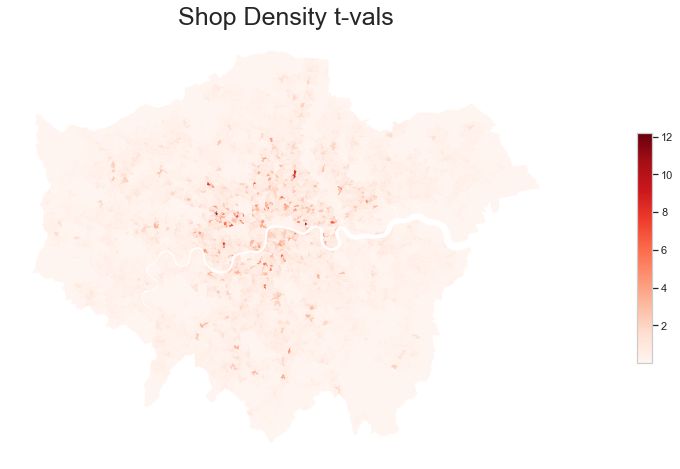

In [97]:
vmin, vmax = np.min(density), np.max(density) 
ax = shop_lsoa.plot('ShopDens', vmin=vmin, vmax=vmax, figsize=(10,8), cmap='Reds', linewidth=0.005)
ax.set_title('Shop Density t-vals', size=25)
fig = ax.get_figure()
ax.set_axis_off()
cax = fig.add_axes([1.0, 0.3, 0.02, 0.4]) # the position and size of colormap legend bar
sm_dens = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Reds')
sm_dens._A = []
fig.colorbar(sm_dens, cax=cax)
plt.savefig('output/density_tval.png')